<a href="https://colab.research.google.com/github/prabdeepkaur/algo_strategies_mini_project2_prabdeep/blob/main/A_3%2CDAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

👤 User: A
📋 Suggested Friends: ['E', 'F', 'D']


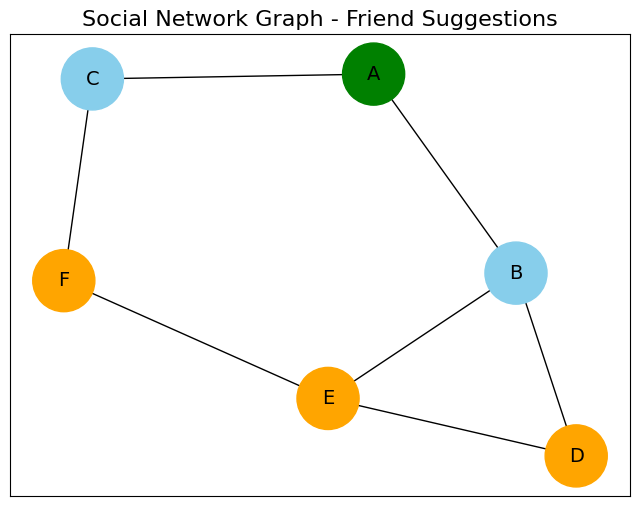


📊 Time Complexity Analysis:
BFS Traversal: O(V + E), where
V = number of users (nodes), E = number of friendships (edges).
Efficient for moderate networks, but large-scale systems (like Facebook) require optimization and parallelization.


In [ ]:
# =====================================
# 1 Social Network Friend Suggestion using BFS
# =====================================

!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# ----------------------------
# Step 1: Graph Modeling
# ----------------------------

# Represent users and their friendships as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B', 'E'],
    'E': ['B', 'D', 'F'],
    'F': ['C', 'E']
}

# ----------------------------
# Step 2: BFS Function
# ----------------------------

def bfs_friend_suggestions(graph, start_user):
    visited = set()
    queue = deque([start_user])
    visited.add(start_user)

    level = {start_user: 0}  # To track distance level
    suggestions = set()

    while queue:
        user = queue.popleft()
        for friend in graph[user]:
            if friend not in visited:
                visited.add(friend)
                queue.append(friend)
                level[friend] = level[user] + 1

                # If the friend is at distance 2 (friend of friend)
                if level[friend] == 2:
                    # Not already a friend or self
                    if friend not in graph[start_user] and friend != start_user:
                        suggestions.add(friend)
    return suggestions

# ----------------------------
# Step 3: Input and Output
# ----------------------------

user = 'A'
suggested_friends = bfs_friend_suggestions(graph, user)

print(f"👤 User: {user}")
print(f"📋 Suggested Friends: {list(suggested_friends)}")

# ----------------------------
# Step 4: Visualization
# ----------------------------

G = nx.Graph()

# Add edges
for node in graph:
    for friend in graph[node]:
        G.add_edge(node, friend)

# Highlight user and suggested friends
node_colors = []
for node in G.nodes():
    if node == user:
        node_colors.append('green')  # Current user
    elif node in suggested_friends:
        node_colors.append('orange')  # Suggested friends
    else:
        node_colors.append('skyblue')  # Normal friends

plt.figure(figsize=(8, 6))
nx.draw_networkx(G, with_labels=True, node_color=node_colors, node_size=2000, font_size=14)
plt.title("Social Network Graph - Friend Suggestions", fontsize=16)
plt.show()

# ----------------------------
# Step 5: Analysis
# ----------------------------

print("\n📊 Time Complexity Analysis:")
print("BFS Traversal: O(V + E), where")
print("V = number of users (nodes), E = number of friendships (edges).")
print("Efficient for moderate networks, but large-scale systems (like Facebook) require optimization and parallelization.")


🚩 Source City: A

📍 Shortest Distance to Each City:
  ➤ A: 0
  ➤ C: 2
  ➤ D: 2
  ➤ E: 4
  ➤ B: 4


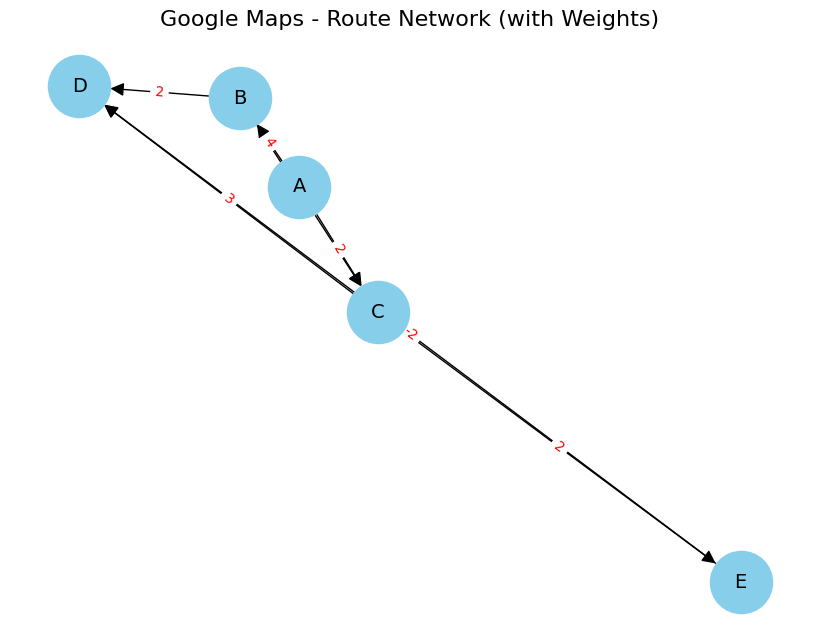


📊 Algorithm Analysis:
➡ Bellman-Ford handles negative edge weights (unlike Dijkstra).
➡ Time Complexity: O(V * E), where V = vertices, E = edges.
➡ Suitable for navigation or financial networks with possible negative costs.


In [ ]:
# =====================================
# 2 Route Finding on Google Maps using Bellman-Ford Algorithm
# =====================================

!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Graph Modeling
# ----------------------------

# Define graph as list of edges: (source, destination, weight)
edges = [
    ('A', 'B', 4),
    ('A', 'C', 2),
    ('B', 'C', -1),
    ('B', 'D', 2),
    ('C', 'D', 3),
    ('C', 'E', 2),
    ('E', 'D', -2)
]

# Extract all unique nodes
nodes = list(set([u for u, v, w in edges] + [v for u, v, w in edges]))

# ----------------------------
# Step 2: Bellman-Ford Algorithm
# ----------------------------

def bellman_ford(nodes, edges, source):
    # Step 1: Initialize distances
    distance = {node: float('inf') for node in nodes}
    distance[source] = 0

    # Step 2: Relax all edges (V-1) times
    for _ in range(len(nodes) - 1):
        for u, v, w in edges:
            if distance[u] + w < distance[v]:
                distance[v] = distance[u] + w

    # Step 3: Detect negative weight cycles
    for u, v, w in edges:
        if distance[u] + w < distance[v]:
            print("⚠️ Negative weight cycle detected!")
            return None

    return distance

# ----------------------------
# Step 3: Input and Output
# ----------------------------

source = 'A'
distances = bellman_ford(nodes, edges, source)

if distances:
    print(f"🚩 Source City: {source}\n")
    print("📍 Shortest Distance to Each City:")
    for city, dist in distances.items():
        print(f"  ➤ {city}: {dist}")

# ----------------------------
# Step 4: Visualization
# ----------------------------

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

# Draw graph
pos = nx.spring_layout(G, seed=42)
edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=2000, font_size=14, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Google Maps - Route Network (with Weights)", fontsize=16)
plt.show()

# ----------------------------
# Step 5: Analysis
# ----------------------------

print("\n📊 Algorithm Analysis:")
print("➡ Bellman-Ford handles negative edge weights (unlike Dijkstra).")
print("➡ Time Complexity: O(V * E), where V = vertices, E = edges.")
print("➡ Suitable for navigation or financial networks with possible negative costs.")


🚑 Emergency Dispatch Center: A

📍 Fastest Travel Time to Each Intersection:
  ➤ A: 0 minutes
  ➤ B: 3 minutes
  ➤ C: 2 minutes
  ➤ D: 8 minutes
  ➤ E: 10 minutes
  ➤ F: 13 minutes


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


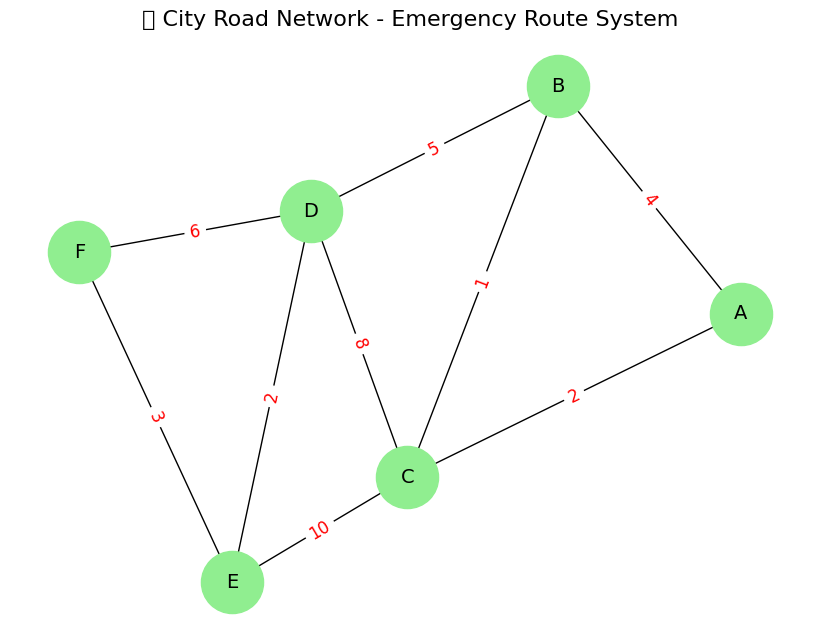


📊 Algorithm Analysis:
➡ Dijkstra’s Algorithm finds the shortest path in graphs with non-negative edge weights.
➡ Time Complexity: O(E log V) using a priority queue (min-heap).
➡ Not suitable for graphs with negative edge weights, because negative weights can cause incorrect shortest path calculations.


In [ ]:
# =====================================
# 3 Emergency Response System using Dijkstra's Algorithm
# =====================================

# Install libraries for visualization
!pip install networkx matplotlib

import heapq
import networkx as nx
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Graph Modeling
# ----------------------------

# Represent city intersections as nodes and roads as weighted edges (travel time in minutes)
graph = {
    'A': [('B', 4), ('C', 2)],
    'B': [('A', 4), ('C', 1), ('D', 5)],
    'C': [('A', 2), ('B', 1), ('D', 8), ('E', 10)],
    'D': [('B', 5), ('C', 8), ('E', 2), ('F', 6)],
    'E': [('C', 10), ('D', 2), ('F', 3)],
    'F': [('D', 6), ('E', 3)]
}

# ----------------------------
# Step 2: Dijkstra’s Algorithm (using Min-Heap)
# ----------------------------

def dijkstra(graph, start):
    # Initialize distances with infinity
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    # Priority queue -> (distance, node)
    pq = [(0, start)]

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # If we already found a shorter path before, skip this one
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor, weight in graph[current_node]:
            distance = current_distance + weight

            # If new path is shorter, update and push to queue
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

# ----------------------------
# Step 3: Input and Output
# ----------------------------

source = 'A'
shortest_distances = dijkstra(graph, source)

print(f"🚑 Emergency Dispatch Center: {source}\n")
print("📍 Fastest Travel Time to Each Intersection:")
for node, dist in shortest_distances.items():
    print(f"  ➤ {node}: {dist} minutes")

# ----------------------------
# Step 4: Visualization
# ----------------------------

# Create a weighted directed graph for visualization
G = nx.Graph()

for node in graph:
    for neighbor, weight in graph[node]:
        G.add_edge(node, neighbor, weight=weight)

pos = nx.spring_layout(G, seed=42)
edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color="lightgreen", node_size=2000, font_size=14)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
plt.title("🚦 City Road Network - Emergency Route System", fontsize=16)
plt.show()

# ----------------------------
# Step 5: Analysis
# ----------------------------

print("\n📊 Algorithm Analysis:")
print("➡ Dijkstra’s Algorithm finds the shortest path in graphs with non-negative edge weights.")
print("➡ Time Complexity: O(E log V) using a priority queue (min-heap).")
print("➡ Not suitable for graphs with negative edge weights, because negative weights can cause incorrect shortest path calculations.")


🏢 Starting Office: A
🔗 MST Edges Selected: [('A', 'D', 1), ('A', 'B', 3), ('B', 'C', 1), ('C', 'E', 4)]
💰 Total Minimum Cable Cost: 9
⏱️ Execution Time: 0.088787 seconds
💾 Average Memory Usage: 130.60 MB


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


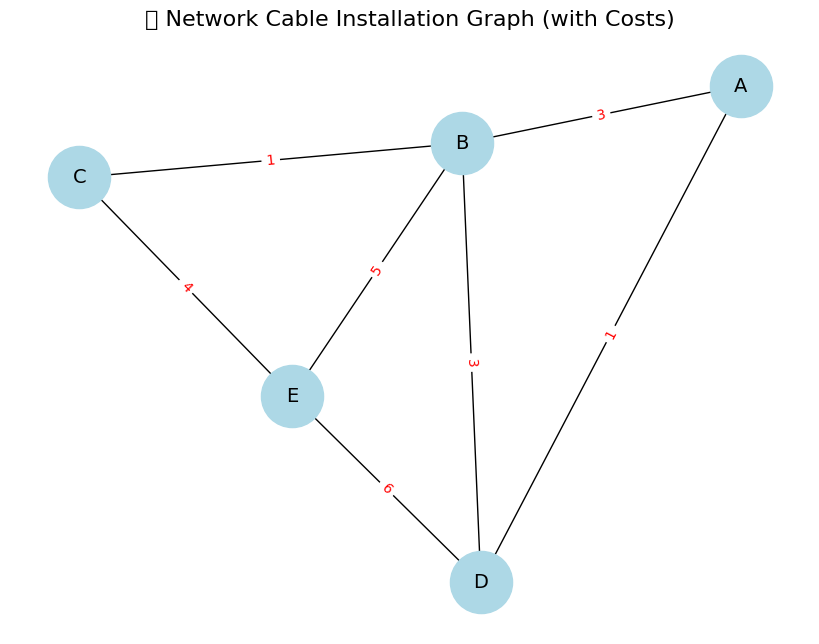

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


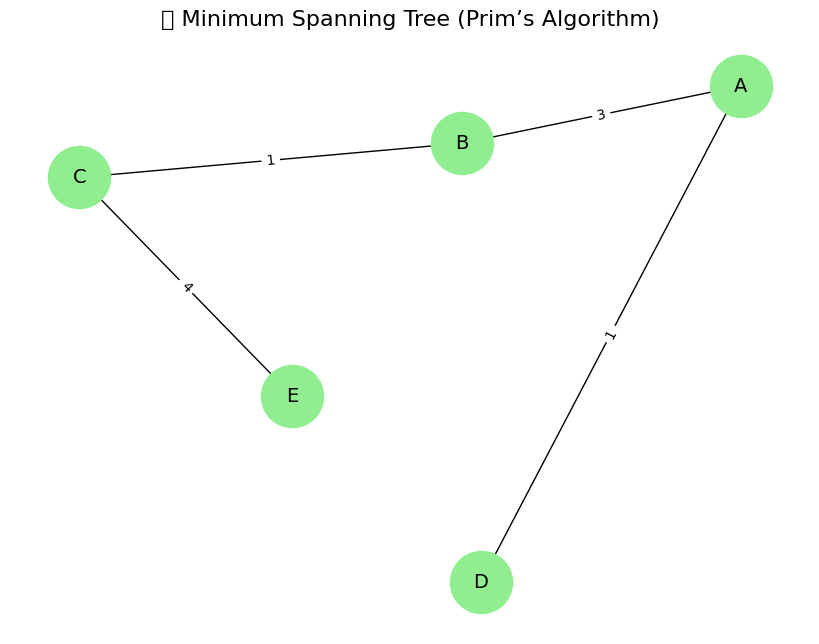

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


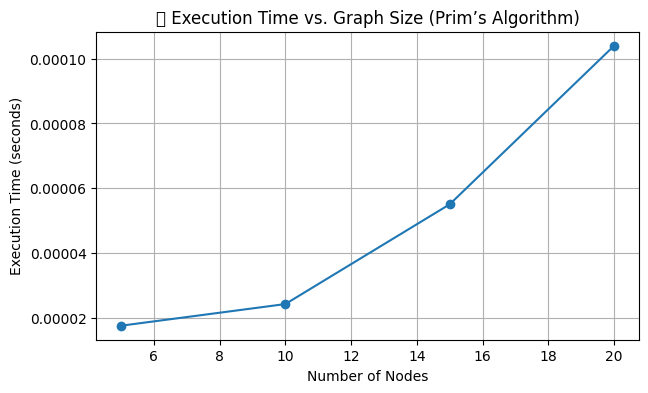


📊 Algorithm Analysis:
➡ Prim’s Algorithm Time Complexity: O(E log V) using Min-Heap.
➡ Kruskal’s Algorithm Time Complexity: O(E log E) (≈ O(E log V)).
➡ Both algorithms find MST but use different strategies:
   • Prim’s grows one tree from a start node.
   • Kruskal’s merges edges by sorting and using Union-Find.
➡ Practical Application: Telecom & IT — minimizing total wiring/cable cost.


In [ ]:
# =====================================
# 3 Network Cable Installation using Minimum Spanning Tree (Prim’s Algorithm)
# =====================================

# Install required libraries
!pip install networkx matplotlib memory_profiler

import heapq
import time
import networkx as nx
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

# ----------------------------
# Step 1: Graph Modeling
# ----------------------------

# Offices (nodes) and cable paths (edges with costs)
graph = {
    'A': [('B', 3), ('D', 1)],
    'B': [('A', 3), ('D', 3), ('C', 1), ('E', 5)],
    'C': [('B', 1), ('E', 4)],
    'D': [('A', 1), ('B', 3), ('E', 6)],
    'E': [('B', 5), ('C', 4), ('D', 6)]
}

# ----------------------------
# Step 2: Prim’s Algorithm (using Min-Heap)
# ----------------------------

def prim_mst(graph, start):
    visited = set()
    min_heap = [(0, start, None)]  # (weight, current_node, previous_node)
    total_cost = 0
    mst_edges = []

    while min_heap:
        weight, node, prev = heapq.heappop(min_heap)
        if node in visited:
            continue
        visited.add(node)
        total_cost += weight
        if prev is not None:
            mst_edges.append((prev, node, weight))

        for neighbor, edge_weight in graph[node]:
            if neighbor not in visited:
                heapq.heappush(min_heap, (edge_weight, neighbor, node))

    return total_cost, mst_edges

# ----------------------------
# Step 3: Execution Profiling (Time & Memory)
# ----------------------------

def run_with_profiling(graph, start):
    start_time = time.time()
    mem_usage = memory_usage((prim_mst, (graph, start)))
    end_time = time.time()

    total_cost, mst_edges = prim_mst(graph, start)
    execution_time = end_time - start_time
    avg_memory = sum(mem_usage) / len(mem_usage)

    return total_cost, mst_edges, execution_time, avg_memory

# Run and measure
start_node = 'A'
total_cost, mst_edges, exec_time, mem_used = run_with_profiling(graph, start_node)

# ----------------------------
# Step 4: Output Results
# ----------------------------

print(f"🏢 Starting Office: {start_node}")
print(f"🔗 MST Edges Selected: {mst_edges}")
print(f"💰 Total Minimum Cable Cost: {total_cost}")
print(f"⏱️ Execution Time: {exec_time:.6f} seconds")
print(f"💾 Average Memory Usage: {mem_used:.2f} MB")

# ----------------------------
# Step 5: Visualization
# ----------------------------

# Create and visualize the original weighted graph
G = nx.Graph()
for node in graph:
    for neighbor, weight in graph[node]:
        G.add_edge(node, neighbor, weight=weight)

pos = nx.spring_layout(G, seed=42)
edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2000, font_size=14)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("🏙️ Network Cable Installation Graph (with Costs)", fontsize=16)
plt.show()

# Visualize the MST
MST = nx.Graph()
for u, v, w in mst_edges:
    MST.add_edge(u, v, weight=w)

plt.figure(figsize=(8,6))
nx.draw(MST, pos, with_labels=True, node_color="lightgreen", node_size=2000, font_size=14)
nx.draw_networkx_edge_labels(MST, pos, edge_labels=nx.get_edge_attributes(MST, 'weight'), font_color='black')
plt.title("🌐 Minimum Spanning Tree (Prim’s Algorithm)", fontsize=16)
plt.show()

# ----------------------------
# Step 6: Performance Visualization (Optional)
# ----------------------------

# Simple simulation: time vs. graph size
import random

def generate_random_graph(n, density=0.5):
    """Generate a random weighted undirected graph with n nodes."""
    G = {chr(65 + i): [] for i in range(n)}
    nodes = list(G.keys())
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < density:
                w = random.randint(1, 10)
                G[nodes[i]].append((nodes[j], w))
                G[nodes[j]].append((nodes[i], w))
    return G

sizes = [5, 10, 15, 20]
times = []

for n in sizes:
    g = generate_random_graph(n)
    start = chr(65)
    t1 = time.time()
    prim_mst(g, start)
    t2 = time.time()
    times.append(t2 - t1)

plt.figure(figsize=(7,4))
plt.plot(sizes, times, marker='o')
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (seconds)")
plt.title("⏳ Execution Time vs. Graph Size (Prim’s Algorithm)")
plt.grid(True)
plt.show()

# ----------------------------
# Step 7: Analysis
# ----------------------------

print("\n📊 Algorithm Analysis:")
print("➡ Prim’s Algorithm Time Complexity: O(E log V) using Min-Heap.")
print("➡ Kruskal’s Algorithm Time Complexity: O(E log E) (≈ O(E log V)).")
print("➡ Both algorithms find MST but use different strategies:")
print("   • Prim’s grows one tree from a start node.")
print("   • Kruskal’s merges edges by sorting and using Union-Find.")
print("➡ Practical Application: Telecom & IT — minimizing total wiring/cable cost.")


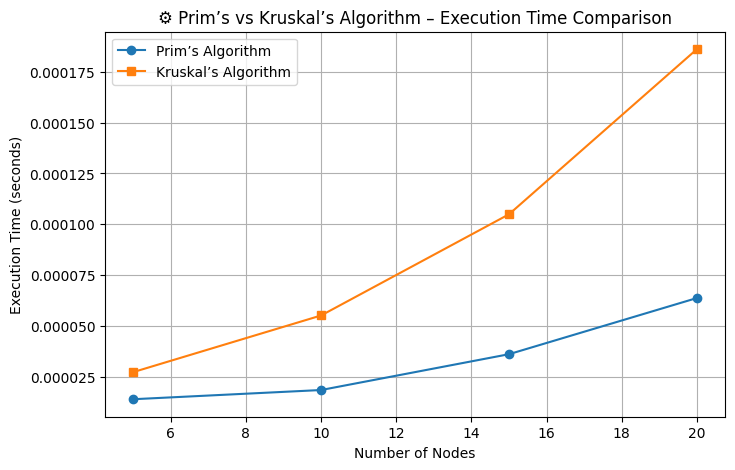

📊 Comparative Algorithm Analysis:
➡ Prim’s Average Time:  0.000033 seconds
➡ Kruskal’s Average Time: 0.000093 seconds

🧠 Insights:
• Prim’s Algorithm often performs better on dense graphs (many edges).
• Kruskal’s Algorithm performs well on sparse graphs (fewer edges).
• Both produce the same MST total cost but differ in approach:
   - Prim’s grows one connected tree outward from a start node.
   - Kruskal’s adds edges by increasing weight using Union-Find.
• Time Complexity:
   - Prim’s: O(E log V)
   - Kruskal’s: O(E log E) ≈ O(E log V)


In [3]:
# =====================================
# Network Cable Installation - Prim’s vs Kruskal’s Algorithm (MST Comparison)
# =====================================

!pip install networkx matplotlib memory_profiler

import heapq
import time
import random
import networkx as nx
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

# ----------------------------
# Step 1: Graph Modeling
# ----------------------------

graph = {
    'A': [('B', 3), ('D', 1)],
    'B': [('A', 3), ('D', 3), ('C', 1), ('E', 5)],
    'C': [('B', 1), ('E', 4)],
    'D': [('A', 1), ('B', 3), ('E', 6)],
    'E': [('B', 5), ('C', 4), ('D', 6)]
}

# ----------------------------
# Step 2: Prim’s Algorithm (Min-Heap)
# ----------------------------

def prim_mst(graph, start):
    visited = set()
    min_heap = [(0, start, None)]
    total_cost = 0
    mst_edges = []

    while min_heap:
        weight, node, prev = heapq.heappop(min_heap)
        if node in visited:
            continue
        visited.add(node)
        total_cost += weight
        if prev is not None:
            mst_edges.append((prev, node, weight))
        for neighbor, edge_weight in graph[node]:
            if neighbor not in visited:
                heapq.heappush(min_heap, (edge_weight, neighbor, node))

    return total_cost, mst_edges

# ----------------------------
# Step 3: Kruskal’s Algorithm (Union-Find)
# ----------------------------

class UnionFind:
    def __init__(self, vertices):
        self.parent = {v: v for v in vertices}

    def find(self, v):
        if self.parent[v] != v:
            self.parent[v] = self.find(self.parent[v])
        return self.parent[v]

    def union(self, v1, v2):
        root1 = self.find(v1)
        root2 = self.find(v2)
        if root1 != root2:
            self.parent[root2] = root1

def kruskal_mst(graph):
    edges = []
    for node in graph:
        for neighbor, weight in graph[node]:
            edges.append((weight, node, neighbor))
    # ✅ Fixed duplicate-removal line
    edges = list(set((w, *sorted((u, v))) for w, u, v in edges))
    edges.sort()  # sort by weight

    uf = UnionFind(graph.keys())
    mst_edges = []
    total_cost = 0

    for weight, u, v in edges:
        if uf.find(u) != uf.find(v):
            uf.union(u, v)
            mst_edges.append((u, v, weight))
            total_cost += weight

    return total_cost, mst_edges

# ----------------------------
# Step 4: Time Measurement Utility
# ----------------------------

def measure_time(func, *args):
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

# Random graph generator
def generate_random_graph(n, density=0.5):
    G = {chr(65 + i): [] for i in range(n)}
    nodes = list(G.keys())
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < density:
                w = random.randint(1, 10)
                G[nodes[i]].append((nodes[j], w))
                G[nodes[j]].append((nodes[i], w))
    return G

# ----------------------------
# Step 5: Compare Execution Times
# ----------------------------

sizes = [5, 10, 15, 20]
prim_times = []
kruskal_times = []

for n in sizes:
    g = generate_random_graph(n)
    start_node = chr(65)
    prim_times.append(measure_time(prim_mst, g, start_node))
    kruskal_times.append(measure_time(kruskal_mst, g))

# ----------------------------
# Step 6: Visualization – Line Graph Comparison
# ----------------------------

plt.figure(figsize=(8,5))
plt.plot(sizes, prim_times, marker='o', label="Prim’s Algorithm")
plt.plot(sizes, kruskal_times, marker='s', label="Kruskal’s Algorithm")
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (seconds)")
plt.title("⚙️ Prim’s vs Kruskal’s Algorithm – Execution Time Comparison")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Step 7: Analysis
# ----------------------------

print("📊 Comparative Algorithm Analysis:")
print(f"➡ Prim’s Average Time:  {sum(prim_times)/len(prim_times):.6f} seconds")
print(f"➡ Kruskal’s Average Time: {sum(kruskal_times)/len(kruskal_times):.6f} seconds")

print("\n🧠 Insights:")
print("• Prim’s Algorithm often performs better on dense graphs (many edges).")
print("• Kruskal’s Algorithm performs well on sparse graphs (fewer edges).")
print("• Both produce the same MST total cost but differ in approach:")
print("   - Prim’s grows one connected tree outward from a start node.")
print("   - Kruskal’s adds edges by increasing weight using Union-Find.")
print("• Time Complexity:")
print("   - Prim’s: O(E log V)")
print("   - Kruskal’s: O(E log E) ≈ O(E log V)")
